<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


Problema.

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

5. Realice un ajuste a la curva construida en el apartado anterior.

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.



Solucion teorica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton

###1.Rta

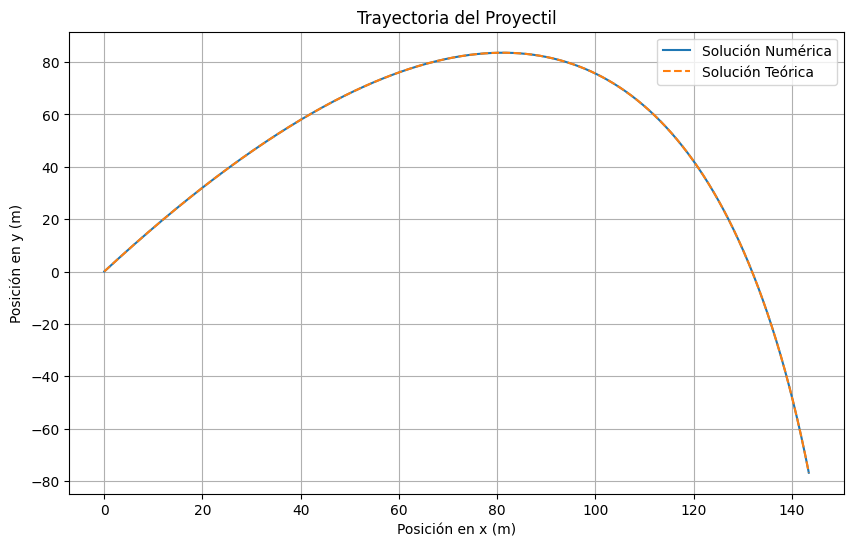

In [2]:
# Parámetros
b = 0.05
theta_0 = 60 * np.pi / 180  # Convertir a radianes
alpha = np.pi
v_0 = 50
g = 9.8
u = v_0 / 2

# Ecuaciones diferenciales del movimiento del proyectil
def projectile_motion(i_c, t, b, theta, u, alpha, v_0):
    x, y, v_x, v_y = i_c
    dv_xdt = - b * (v_x - u * np.cos(alpha))
    dv_ydt = -(g + b * (v_y - u * np.sin(alpha)))
    return [v_x, v_y, dv_xdt, dv_ydt]

# Solución numérica
t = np.linspace(0, 10, 1000)
y0 = [0, 0, v_0 * np.cos(theta_0), v_0 * np.sin(theta_0)]
solution = odeint(projectile_motion, y0, t, args=(b, theta_0, u, alpha, v_0))

# Solución teórica
g = 9.8  # Aceleración debida a la gravedad
x_theoretical = u * np.cos(alpha) * t + (1 / b) * (v_0 * np.cos(theta_0) - u * np.cos(alpha)) * (1 - np.exp(-b * t))
y_theoretical = (1 / b) * ((g / b) + v_0 * np.sin(theta_0) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t

# Gráfica de la trayectoria
plt.figure(figsize=(10, 6))
plt.plot(solution[:, 0], solution[:, 1], label='Solución Numérica')
plt.plot(x_theoretical, y_theoretical, label='Solución Teórica', linestyle='dashed')
plt.title('Trayectoria del Proyectil')
plt.xlabel('Posición en x (m)')
plt.ylabel('Posición en y (m)')
plt.grid(True)
plt.legend()
plt.show()

###3.Rta

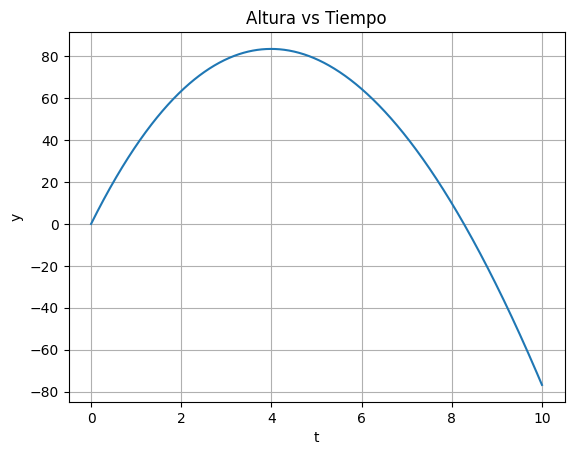

In [3]:
plt.plot(t, solution[:, 1])
plt.title("Altura vs Tiempo")
plt.ylabel("y")
plt.xlabel("t")
plt.grid(True)
plt.show()

In [7]:
theta_0 = 45 * np.pi / 180
y = lambda t: (1 / b) * ((g / b) + v_0 * np.sin(theta_0) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t

t_max = newton(y, 8)
print("El tiempo que tarda en caer es: ", round(t_max, 5), "s")

El tiempo que tarda en caer es:  6.82765 s


In [8]:
x = lambda t: u * np.cos(alpha) * t + (1 / b) * (v_0 * np.cos(theta_0) - u * np.cos(alpha)) * (1 - np.exp(-b * t))

print("La distancia máxima es: ", round(x(t_max), 5), "m")

La distancia máxima es:  178.41982 m


###4.Rta:

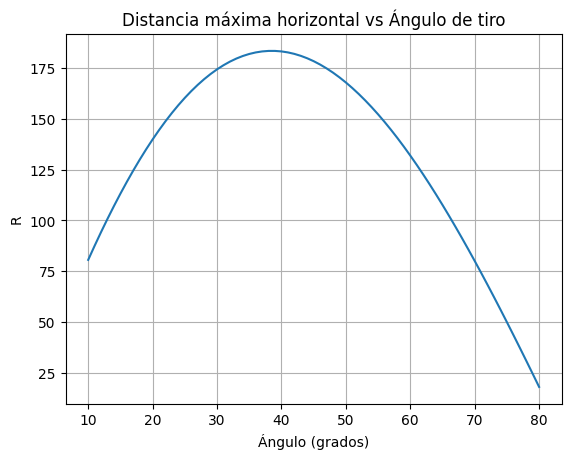

In [9]:
# Definir ángulos en radianes entre 10 y 80 grados
theta = np.arange(10, 81) * np.pi / 180

# Inicializar un array para almacenar las distancias máximas R
R = np.zeros(len(theta))

# Inicializar un índice para recorrer el array R
j = 0

# Iterar sobre cada ángulo en theta
for i in theta:
    # Definir la función y(t) que representa la altura en función del tiempo
    y = lambda t: (1 / b) * ((g / b) + v_0 * np.sin(i) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t

    # Encontrar el tiempo t_max en el cual y(t) alcanza su máximo (cuando y'(t) = 0)
    t_max = newton(y, 7)

    # Definir la función x(t) que representa la posición en x en función del tiempo
    x = lambda t: u * np.cos(alpha) * t + (1 / b) * (v_0 * np.cos(i) - u * np.cos(alpha)) * (1 - np.exp(-b * t))

    # Almacenar la distancia máxima R para el ángulo actual en el array R
    R[j] = x(t_max)

    # Incrementar el índice
    j += 1

# Convertir ángulos de radianes a grados
theta = theta * 180 / np.pi

# Graficar la distancia máxima R en función del ángulo
plt.plot(theta, R)
plt.xlabel("Ángulo (grados)")
plt.ylabel("R")
plt.title("Distancia máxima horizontal vs Ángulo de tiro")
plt.grid(True)
plt.show()

###7.Rta:

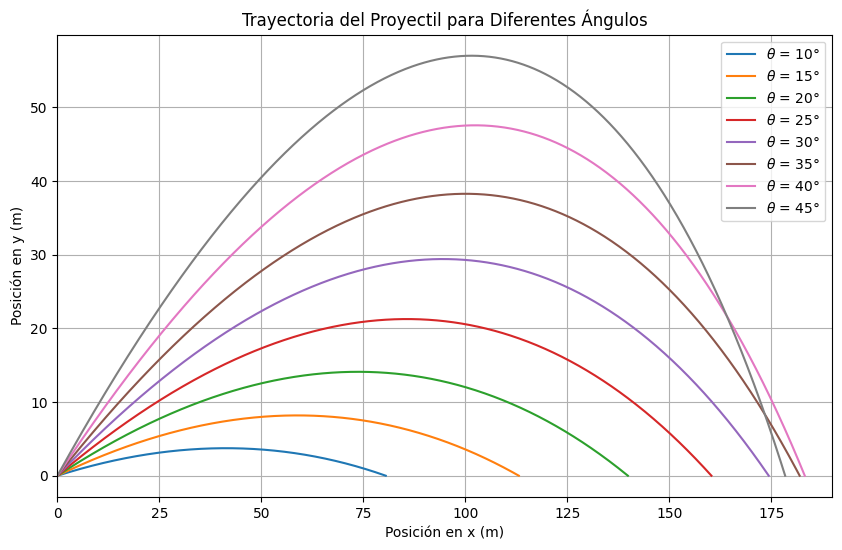

In [10]:
# Definir ángulos en radianes entre 10 y 45 grados
theta = np.arange(10, 46, 5) * np.pi / 180

# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Iterar sobre cada ángulo en theta
for angle in theta:
    # Definir la función y(t) que representa la altura en función del tiempo
    y = lambda t: (1 / b) * ((g / b) + v_0 * np.sin(angle) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t
    # Encontrar el tiempo t_max en el cual y(t) alcanza su máximo (cuando y'(t) = 0)
    t_max = newton(y, 7)
    # Crear un array de tiempo de 0 a t_max con 1000 puntos
    t = np.linspace(0, t_max, 1000)

    # Definir las funciones x(t) e y(t) que representan las posiciones en x e y en función del tiempo
    x = u * np.cos(alpha) * t + (1 / b) * (v_0 * np.cos(angle) - u * np.cos(alpha)) * (1 - np.exp(-b * t))
    y = (1 / b) * ((g / b) + v_0 * np.sin(angle) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t

    # Graficar la trayectoria del proyectil con etiquetas para cada ángulo
    plt.plot(x, y, label=f"$\\theta$ = {round(np.degrees(angle))}°")

# Configurar detalles de la gráfica
plt.title('Trayectoria del Proyectil para Diferentes Ángulos')
plt.xlabel('Posición en x (m)')
plt.ylabel('Posición en y (m)')
plt.grid(True)
plt.legend()
plt.xlim(0, 190)  # Ajustar el límite en x para una mejor visualización
plt.show()


###8.Rta

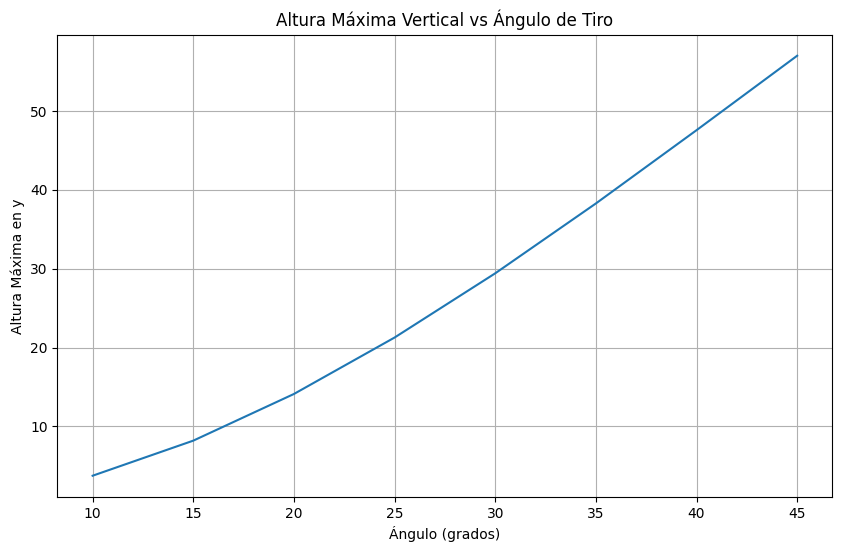

In [11]:
# Definir ángulos en radianes entre 10 y 45 grados
theta = np.arange(10, 46, 5) * np.pi / 180

# Inicializar un array para almacenar las distancias máximas en y
R = np.zeros(len(theta))

# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Inicializar un índice para recorrer el array R
j = 0

# Iterar sobre cada ángulo en theta
for angle in theta:
    # Definir la función y(t) que representa la altura en función del tiempo
    y = lambda t: (1 / b) * ((g / b) + v_0 * np.sin(angle) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t
    # Encontrar el tiempo t_max en el cual y(t) alcanza su máximo (cuando y'(t) = 0)
    t_max = newton(y, 7)
    # Crear un array de tiempo de 0 a t_max con 1000 puntos
    t = np.linspace(0, t_max, 1000)

    # Calcular la trayectoria en y en función del tiempo
    y = (1 / b) * ((g / b) + v_0 * np.sin(angle) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t

    # Almacenar la máxima altura alcanzada en el array R
    R[j] = np.max(y)

    # Incrementar el índice
    j += 1

# Convertir ángulos de radianes a grados
theta = theta * 180 / np.pi

# Graficar la máxima altura en y en función del ángulo
plt.plot(theta, R)
plt.xlabel("Ángulo (grados)")
plt.ylabel("Altura Máxima en y")
plt.title("Altura Máxima Vertical vs Ángulo de Tiro")
plt.grid(True)
plt.show()